# Avaliação Semanal 4 - ICD - Técnicas de Agrupamento

## Questão 1:

Com relação ao agrupamento de dados, podemos afirmar:

Escolha uma opção:

a.Só podemos usar medidas de similaridade para fazer o agrupamento. <br>
b.A classe dos objetos precisa ser conhecida. <br>
c.O método k-means é similar ao método k-vizinhos. <br>
d.O agrupamento de dados é um método semi-supervisionado. <br>
<font color='red'>e.O agrupamento apresenta um certo nível de subjetividade que depende do critério usado para definir os clusters.</font> <br>

## Questão 2:

Com relação ao método k-means selecione a alternativa correta:

Escolha uma opção:

<font color='red'>a.O algoritmo é bastante simples, mas é sensível à posição inicial das sementes.</font> <br>
b.Não é susceptível a problemas quando clusters são de diferentes formatos (em geral não globulares). <br>
c.O algoritmo é extremamente caro em termos computacionais.<br>
d.Não é susceptível a problemas quando clusters são de diferentes densidades.<br>
e.O algoritmo é ótimo com relação à minimização do erro na classificação.<br>

## Questão 3:

A avaliação de agrupamentos é importante:

Escolha uma opção:

a.Para determinar qual método de classificação é o mais adequado.<br>
b.Para comparar diferentes métodos de agrupamento e identificar outliers.<br>
<font color='red'>c.Para evitar encontrar padrões em ruídos, comparar diferentes métodos de agrupamento e comparar clusters.</font> <br>
d.Para avaliar o erro no ajuste do modelo preditivo.<br>
e.Para evitar overfitting.<br>

## Questão 4:   
Considere os dados gerados pelo código abaixo.   
Usando o método k-means e a medida normalized mutual information, determine o número ideal de clusters para os dados abaixo.   
Veja o exemplo da aula.

Escolha uma opção:

<font color='red'>a.4</font> <br>
b.6<br>
c.7<br>
d.1<br>
e.2<br>

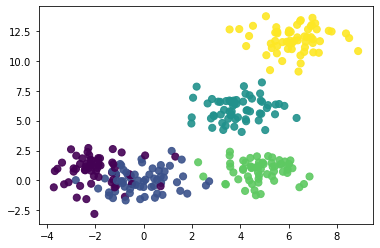

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(201)
import numpy as np
import matplotlib.pyplot as plt
# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]
n=300
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

Text(0.5, 1.0, 'K-means')

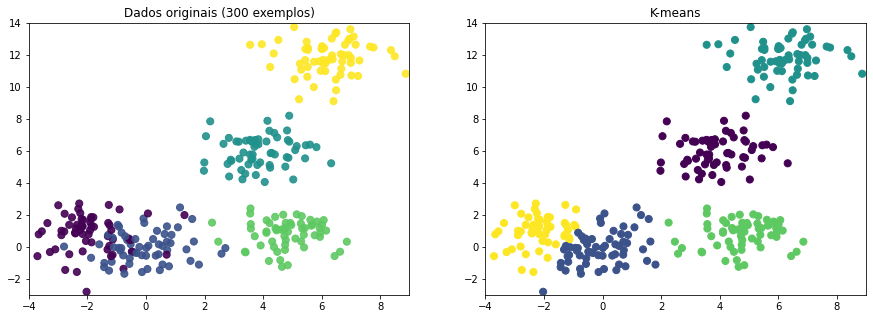

In [2]:
plt.figure(figsize=(15,5))

# mostra os dados originais
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-4,9)
plt.ylim(-3,14)
plt.title(f"Dados originais ({len(X)} exemplos)")

# mostra o k-means
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-4,9)
plt.ylim(-3,14)
plt.title('K-means')


In [3]:
# Métricas
from sklearn.metrics.cluster import normalized_mutual_info_score
print('K-means:')
print('Mutual information score:', normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
print('\n')

K-means:
Mutual information score: 0.8750398681783621




C:\Users\joaop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joaop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


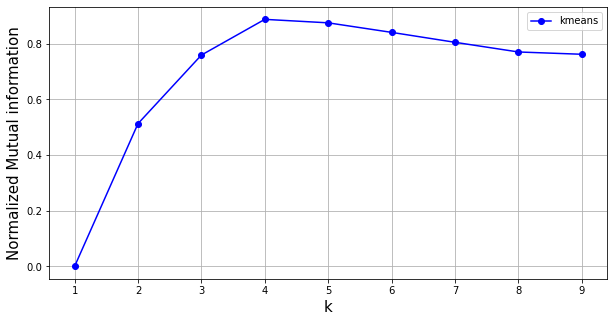

best_k=  4 
best_NMI=  0.8875582355817716


In [4]:
# Buscando o k ótimo
from scipy.spatial.distance import cdist

NMI_km = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))

plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

best_k = 0
best_NMI = 0

for k, NMI in enumerate(NMI_km, start=1):
    if NMI > best_NMI:
        best_NMI = NMI
        best_k = k
print('best_k= ', best_k, '\nbest_NMI= ', best_NMI)        

## Questão 5:   
Determine o número ideal de clusters para a base Iris usando o método k-means e a medida normalized mutual informaton.   
Siga o exemplo da aula.   
Use o código abaixo para ler os dados.

Escolha uma opção:

<font color='red'>a.3</font> <br>
b.4<br>
c.2<br>
d.1<br>
e.6<br>

In [5]:
from sklearn import datasets
import numpy as np
np.random.seed(101)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

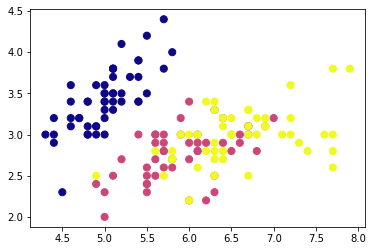

In [8]:
# Plotando os dados
X = iris.data
labels = iris.target
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma', s=50, alpha=1)
plt.show(True)

Text(0.5, 1.0, 'K-means')

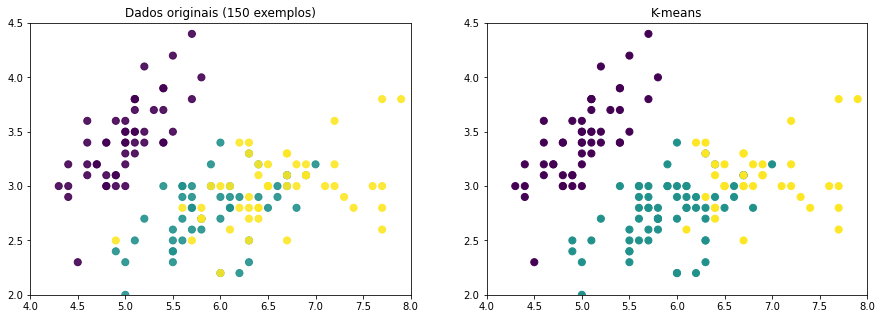

In [9]:
# Plotando os dados originais ao lado do K-means
plt.figure(figsize=(15,5))

# mostra os dados originais
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(4,8)
plt.ylim(2,4.5)
plt.title(f"Dados originais ({len(X)} exemplos)")

# mostra o k-means
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(4,8)
plt.ylim(2,4.5)
plt.title('K-means')

In [10]:
# Métricas
from sklearn.metrics.cluster import normalized_mutual_info_score
print('K-means:')
print('Mutual information score:', normalized_mutual_info_score(y_km, labels, average_method='arithmetic'))
print('\n')

K-means:
Mutual information score: 0.7581756800057784




C:\Users\joaop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joaop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


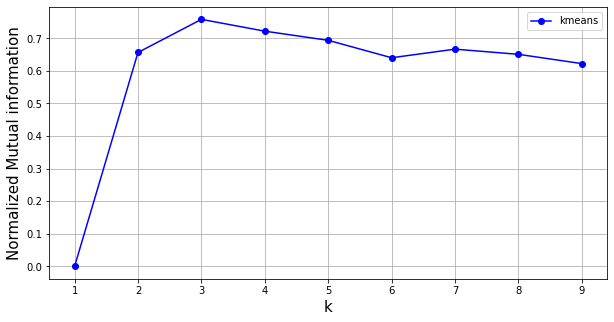

best_k=  3 
best_NMI=  0.7581756800057784


In [11]:
# Buscando o k ótimo
from scipy.spatial.distance import cdist

NMI_km = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, labels, average_method='arithmetic'))

plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

best_k = 0
best_NMI = 0

for k, NMI in enumerate(NMI_km, start=1):
    if NMI > best_NMI:
        best_NMI = NMI
        best_k = k
print('best_k= ', best_k, '\nbest_NMI= ', best_NMI)